## Bonus Challenge

##### Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from credentials import password
from sqlalchemy import create_engine

##### Creating Database Connection

In [2]:
connection_string = f"postgres:{password}@localhost:5432/employees_db"
engine = create_engine(f'postgresql://{connection_string}')

In [3]:
# Printing database tables
engine.table_names()

['dept_emp', 'departments', 'dept_manager', 'titles', 'salaries', 'employees']

### Bonus #1 Importing SQL database into Pandas Dataframes

In [4]:
dept_emp_df = pd.read_sql_table("dept_emp", con = engine)
departments_df = pd.read_sql_table("departments", con = engine)
dept_manager_df = pd.read_sql_table("dept_manager", con = engine)
titles_df = pd.read_sql_table("titles", con = engine)
salaries_df = pd.read_sql_table("salaries", con = engine)
employees_df = pd.read_sql_table("employees", con = engine)

### Bonus #2 Creating a histogram to visualize the most common salary ranges for employees

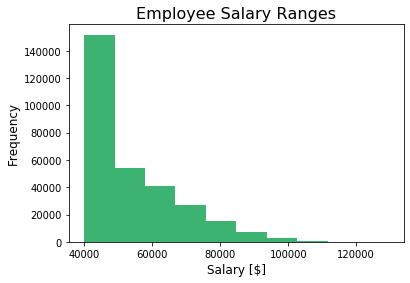

In [5]:
# Extracting series to generate plot
salaries = salaries_df["salary"]

# Generating plot
plt.hist(salaries, color = "mediumseagreen")
plt.title("Employee Salary Ranges", fontsize = 16)
plt.xlabel("Salary [$]", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

### Bonus #3 Creating a bar chart of average salary by title

In [6]:
# Querying salaries and titles by "emp_no"
query_1 = pd.read_sql_query('select T2.salary, T3.title from employees as T1 inner join salaries as T2 on T1.emp_no = T2.emp_no inner join titles as T3 on T1.emp_title_id = T3.title_id', con = engine)

# Grouping by titles and calculating avg salary
avg_salaries_df = query_1.groupby("title").mean().round(2)
avg_salaries_df.rename(columns={"salary": "avg salary"}, inplace=True)
avg_salaries_df

,avg salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


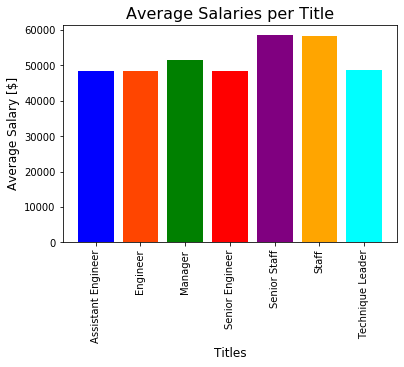

In [7]:
# Setting x and y values
x_values = avg_salaries_df.index
y_values = avg_salaries_df["avg salary"]

# Generating plot
colors = ["blue", "orangered", "green", "red", "purple", "orange", "cyan"]
plt.bar(x_values, y_values, color = colors)
plt.title("Average Salaries per Title", fontsize = 16)
plt.xlabel("Titles", fontsize = 12)
plt.ylabel("Average Salary [$]", fontsize = 12)
plt.xticks(rotation = 90)

plt.show()

### Epilogue

Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [8]:
# Looking for employee data by emp_no = 499942
query_2 = pd.read_sql_query('select * from employees where emp_no = 499942', con = engine)

# Printing results
query_2

# Gottcha, boss!

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
